In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Healthcare-Diabetes.csv')

data.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2768.0,1384.500000,799.197097,1.000,692.750,1384.500,2076.250,2768.00
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


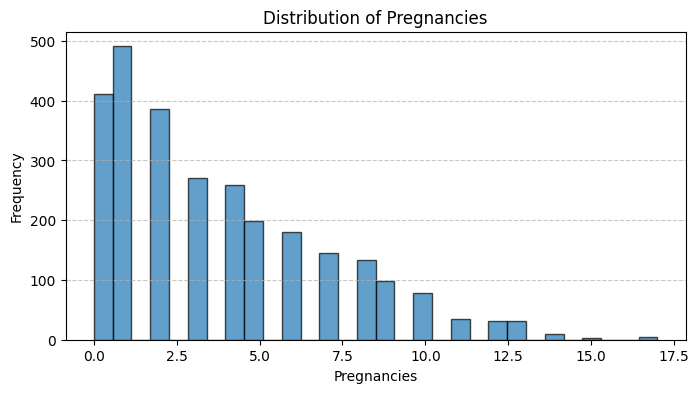

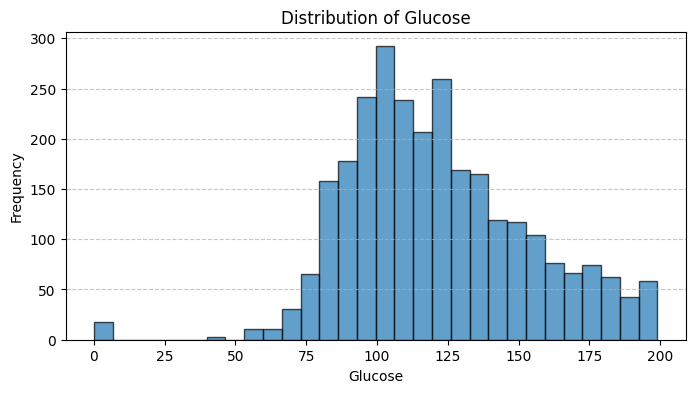

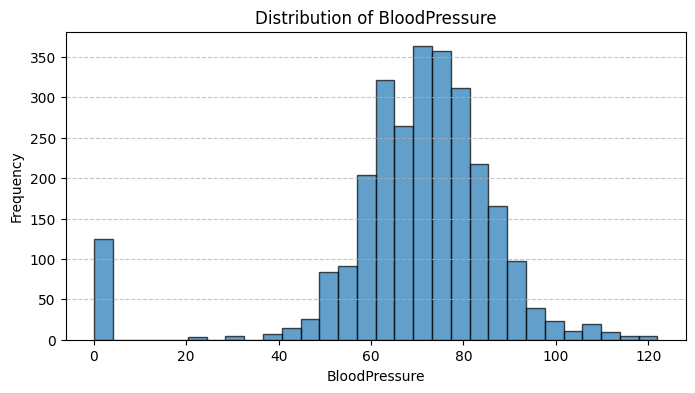

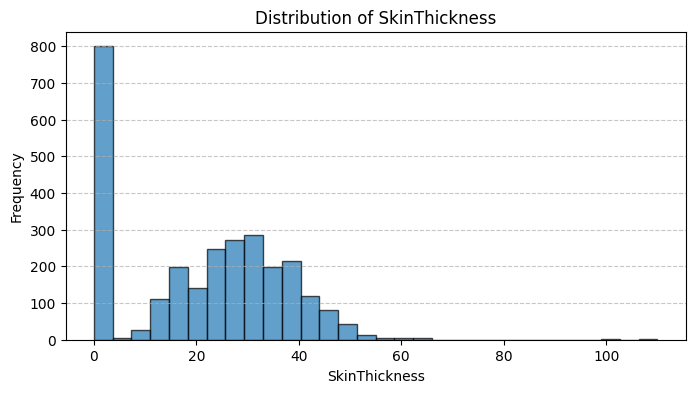

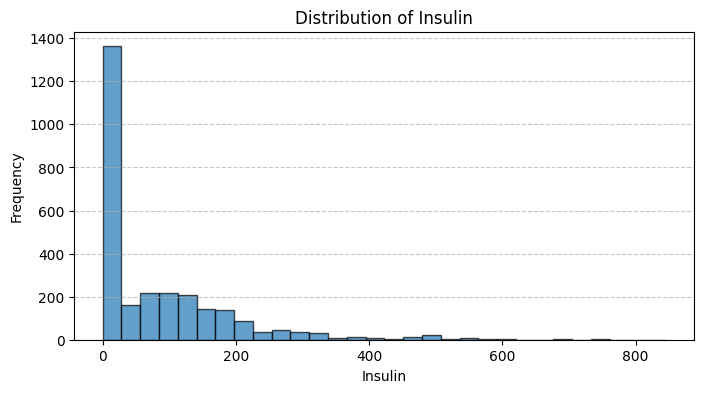

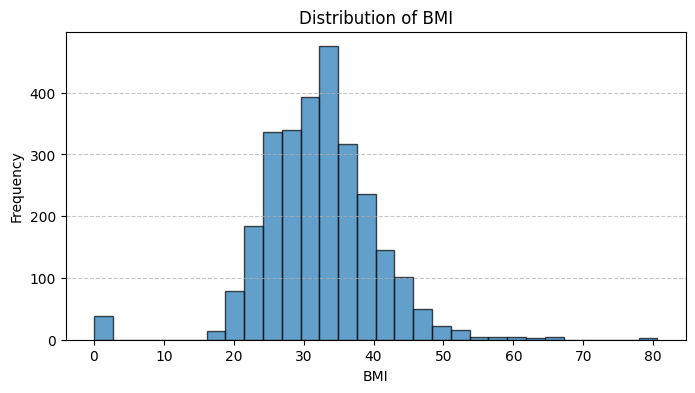

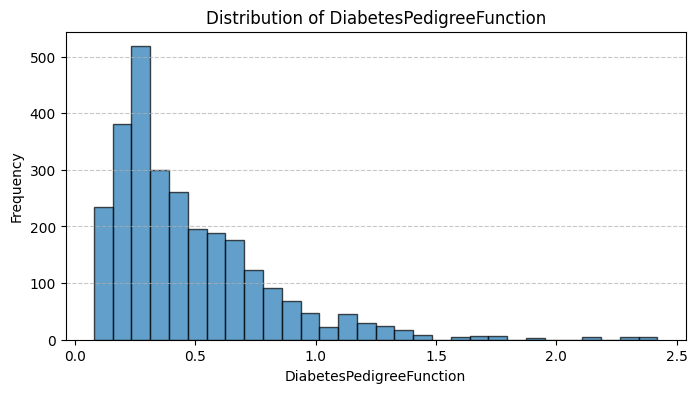

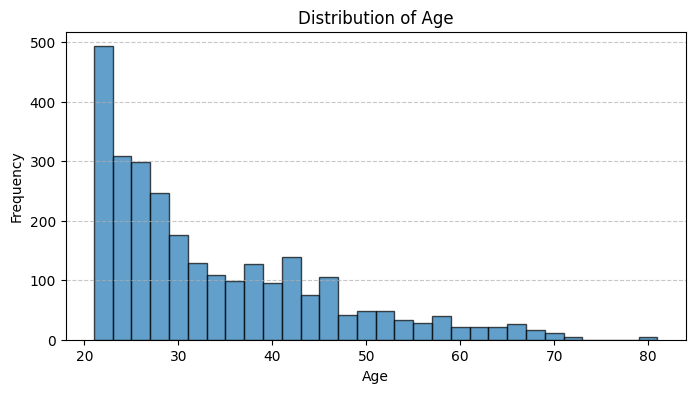

         Outcome
Outcome         
0           1816
1            952


In [5]:
# Import library yang diperlukan
import matplotlib.pyplot as plt
import pandas as pd

# Kolom numerik
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 
                     'BMI', 'DiabetesPedigreeFunction', 'Age']

# Kolom kategorikal
categorical_columns = ['Outcome']

# Plot distribusi kolom numerik
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(data[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Summary untuk kolom kategorikal
categorical_summary = data[categorical_columns].apply(pd.Series.value_counts)

print(categorical_summary)


In [6]:
# Cek null
data.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.shape

(2768, 10)

In [8]:
# Fungsi untuk mendeteksi outlier menggunakan metode IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analisis outlier untuk setiap kolom numerik
outlier_results = {}
for col in numerical_columns:
    outliers, lower, upper = detect_outliers_iqr(data, col)
    outlier_results[col] = {
        "outliers_count": len(outliers),
        "lower_bound": lower,
        "upper_bound": upper
    }

# Menampilkan hasil analisis outlier
outlier_results

{'Pregnancies': {'outliers_count': 16,
  'lower_bound': -6.5,
  'upper_bound': 13.5},
 'Glucose': {'outliers_count': 18, 'lower_bound': 36.0, 'upper_bound': 204.0},
 'BloodPressure': {'outliers_count': 158,
  'lower_bound': 35.0,
  'upper_bound': 107.0},
 'SkinThickness': {'outliers_count': 5,
  'lower_bound': -48.0,
  'upper_bound': 80.0},
 'Insulin': {'outliers_count': 103,
  'lower_bound': -195.0,
  'upper_bound': 325.0},
 'BMI': {'outliers_count': 77,
  'lower_bound': 13.312500000000002,
  'upper_bound': 50.6125},
 'DiabetesPedigreeFunction': {'outliers_count': 97,
  'lower_bound': -0.32600000000000007,
  'upper_bound': 1.194},
 'Age': {'outliers_count': 64, 'lower_bound': 0.0, 'upper_bound': 64.0}}

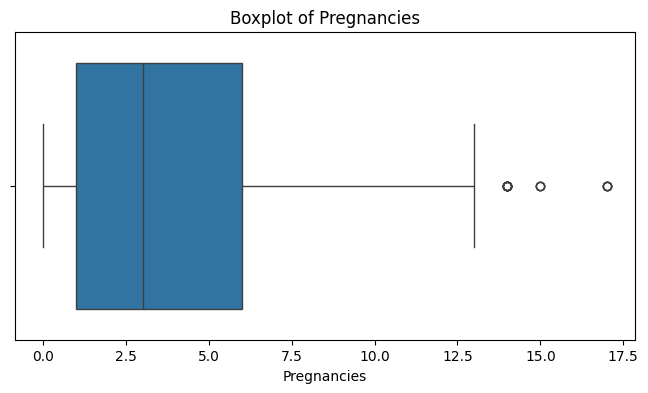

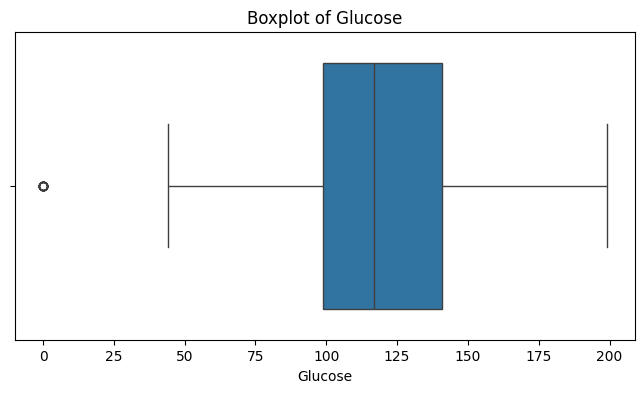

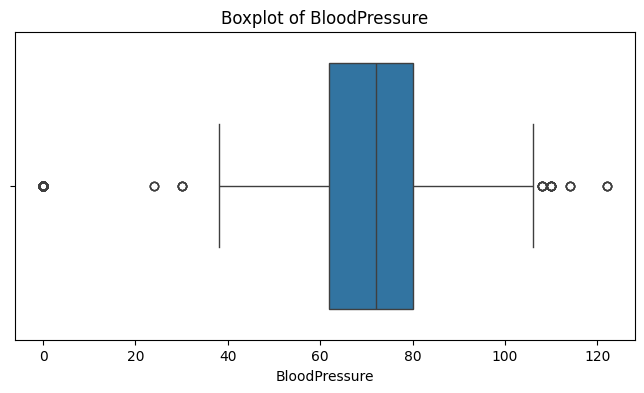

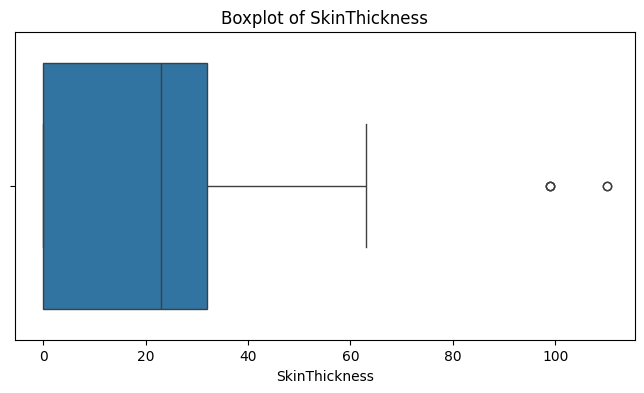

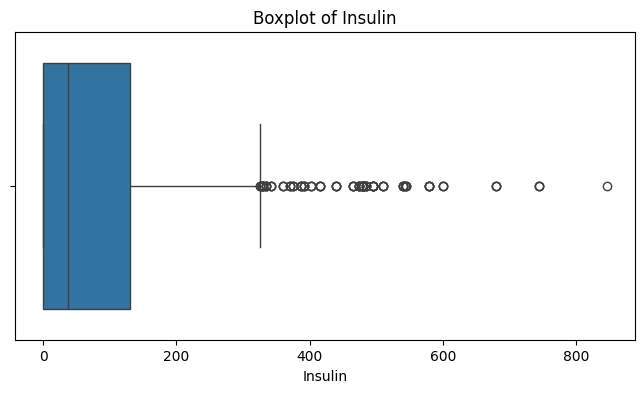

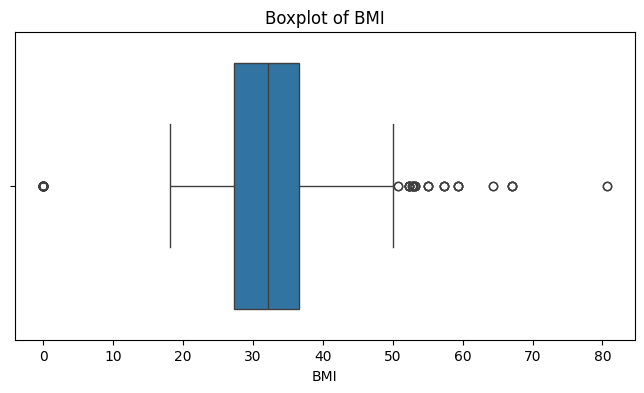

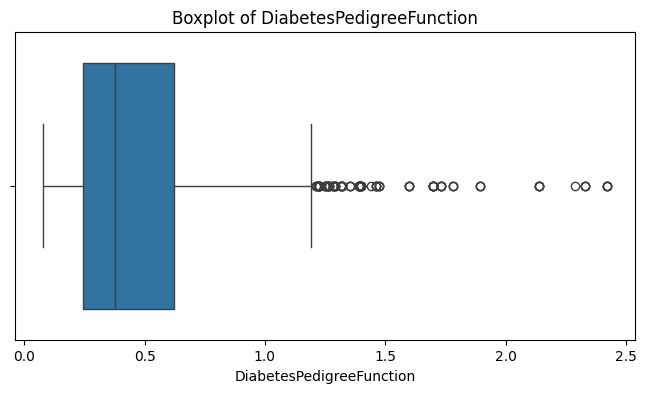

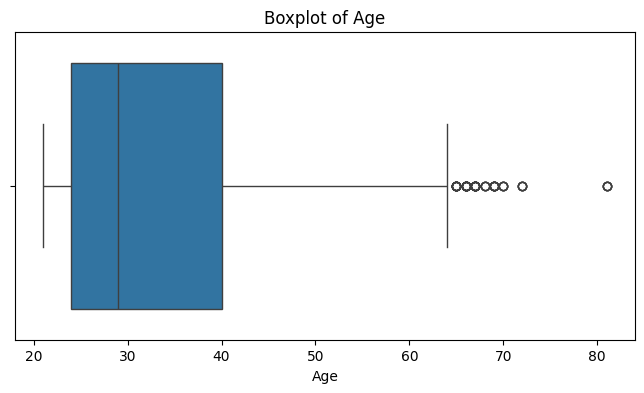

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daftar fitur numerik dari dataset yang diberikan
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Membuat boxplot untuk setiap fitur numerik
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


In [10]:
def handle_outliers_with_IQR(df, column):
    """ Handle outliers in a dataframe column using the IQR method.
        Values outside 1.5 * IQR from the Q1 and Q3 quartiles are considered outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

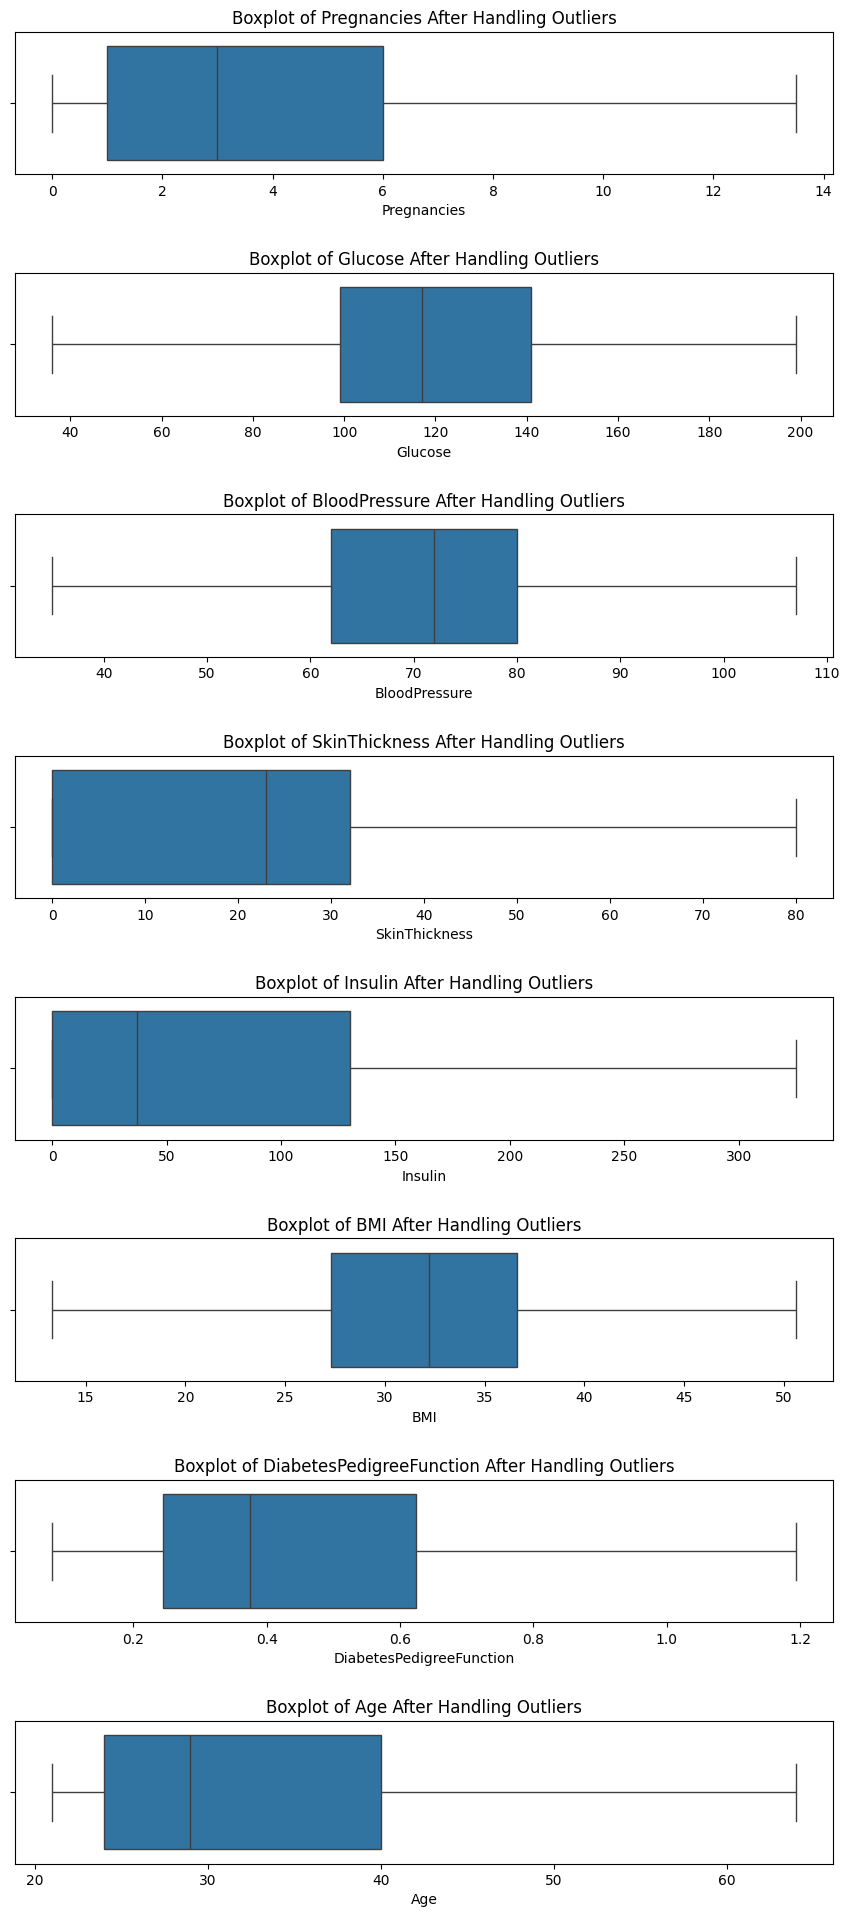

In [11]:
# Applying the IQR method to each continuous column
for col in numerical_columns:
    handle_outliers_with_IQR(data, col)

# Plotting the boxplots for continuous variables after handling outliers
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(numerical_columns):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} After Handling Outliers')
    axes[i].set_xlabel(col)

plt.show()

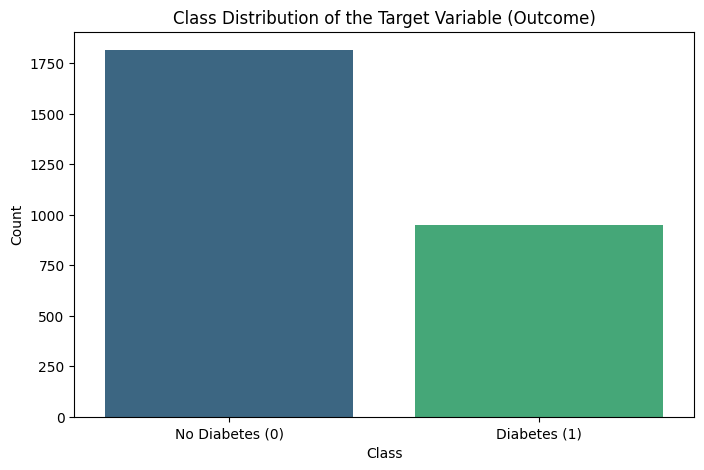

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengecek distribusi kelas dalam target variable
target_column = 'Outcome'  # Sesuai dengan dataset yang diberikan
class_counts = data[target_column].value_counts()

# Plot distribusi kelas
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title('Class Distribution of the Target Variable (Outcome)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.show()


In [15]:
class_counts

Outcome
0    1816
1     952
Name: count, dtype: int64

In [16]:
from sklearn.utils import resample

# Separate the minority and majority classes
data_majority = data[data[target_column] == 0]
data_minority = data[data[target_column] == 1]

In [17]:
# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                   replace=True,     # sample with replacement
                                   n_samples=len(data_majority),    # to match majority class
                                   random_state=123) # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Display new class counts
upsampled_class_counts = data_upsampled[target_column].value_counts()

In [18]:
upsampled_class_counts

Outcome
0    1816
1    1816
Name: count, dtype: int64

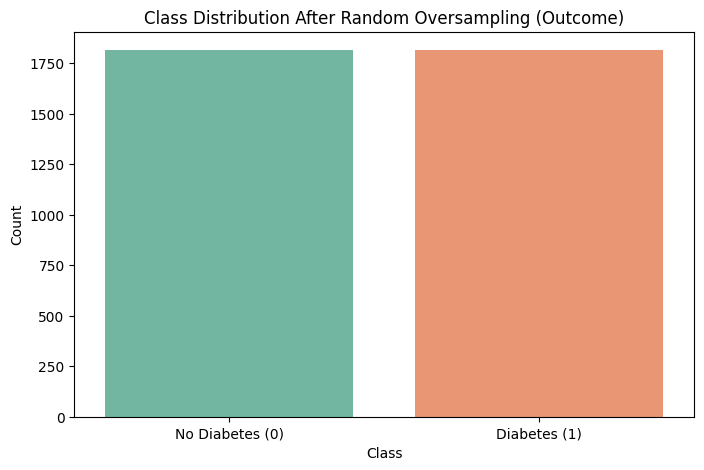

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi kelas setelah resampling
plt.figure(figsize=(8, 5))
sns.barplot(
    x=upsampled_class_counts.index, 
    y=upsampled_class_counts.values, 
    palette='Set2'  # Menggunakan palet warna yang lebih lembut
)
plt.title('Class Distribution After Random Oversampling (Outcome)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Diabetes (0)', 'Diabetes (1)'])
plt.show()


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Menggunakan dataset yang telah di-resampling (data_upsampled)
X = data_upsampled.drop(columns=['Outcome'])
y = data_upsampled['Outcome']

# Split data menjadi training dan testing set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi fitur dengan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary untuk menyimpan hasil evaluasi model
results = {}

# List model yang akan diuji
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Training dan evaluasi model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, "predict_proba") else None

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC-ROC": roc_auc_score(y_test, y_proba) if y_proba is not None else None
    }

# Menampilkan hasil evaluasi model
results_df = pd.DataFrame(results).T


In [21]:
# Sort results by Accuracy in descending order
results_sorted = results_df.sort_values(by="Accuracy", ascending=False)
results_sorted

,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000
Gradient Boosting,0.899587,0.869898,0.939394,0.903311,0.965088
K-Nearest Neighbors,0.863824,0.814286,0.942149,0.873563,0.954167
Support Vector Machine,0.855571,0.824121,0.903581,0.862024,0.921124
Logistic Regression,0.762036,0.760989,0.763085,0.762036,0.836974


In [22]:
# Identify the best model based on Accuracy
best_model_name = results_sorted.index[0]
best_model = models[best_model_name]
best_model

RandomForestClassifier()

Accuracy: 1.00


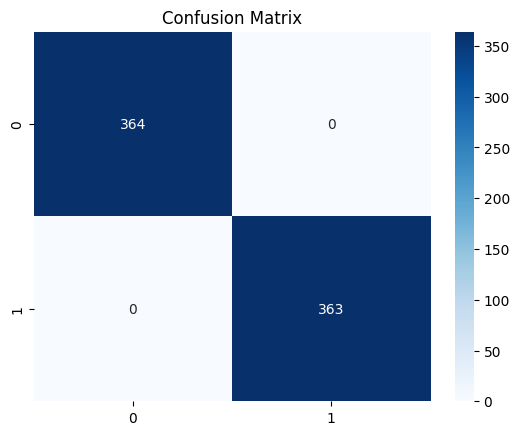

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report


# Predictions
predictions = best_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Generate classification report
report = classification_report(y_test, predictions, target_names=["Class 0", "Class 1"])

print(report)

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       364
     Class 1       1.00      1.00      1.00       363

    accuracy                           1.00       727
   macro avg       1.00      1.00      1.00       727
weighted avg       1.00      1.00      1.00       727



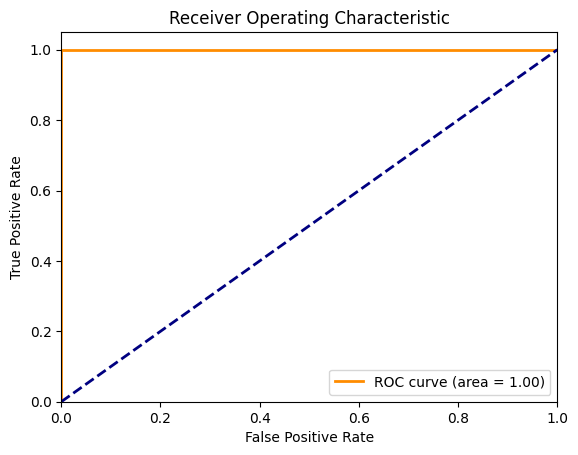

In [25]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [26]:
from sklearn.model_selection import cross_validate

# Perform cross-validation
cv_results = cross_validate(
    best_model,
    X,
    y,
    cv=5,  # 5-fold cross-validation
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=False
)

# Summarize cross-validation results
cv_summary = {
    "Accuracy": cv_results['test_accuracy'].mean(),
    "Precision": cv_results['test_precision'].mean(),
    "Recall": cv_results['test_recall'].mean(),
    "F1-Score": cv_results['test_f1'].mean()
}

cv_summary


{'Accuracy': 0.8216183341480328,
 'Precision': 0.8119073854824993,
 'Recall': 0.9944933854024764,
 'F1-Score': 0.8750436684805148}

In [27]:
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and target variable
X2 = data_upsampled.drop('Outcome', axis=1)
y2 = data_upsampled['Outcome']

# Splitting the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

Model: Logistic Regression
Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1 Score: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       379
           1       0.75      0.77      0.76       348

    accuracy                           0.77       727
   macro avg       0.77      0.77      0.77       727
weighted avg       0.77      0.77      0.77       727



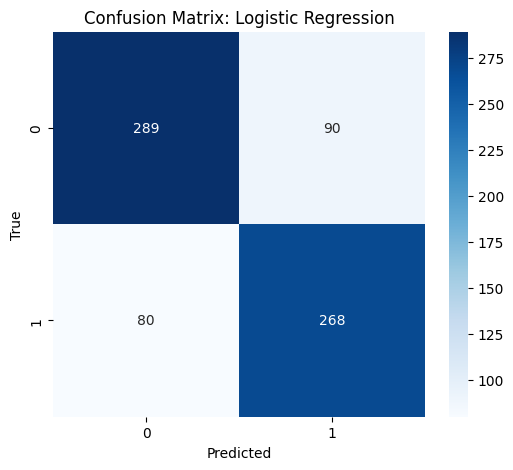

Model: Decision Tree
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       379
           1       0.99      1.00      0.99       348

    accuracy                           0.99       727
   macro avg       0.99      0.99      0.99       727
weighted avg       0.99      0.99      0.99       727



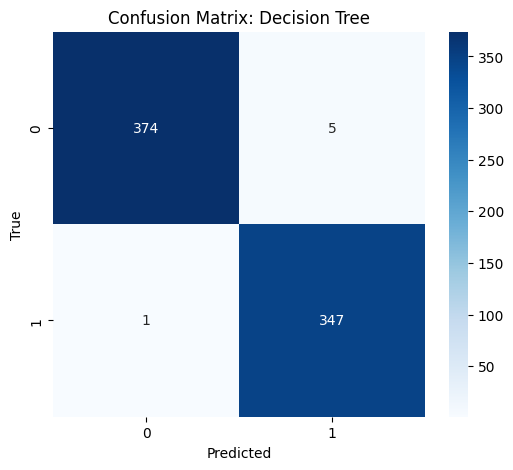

Model: Random Forest
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       379
           1       1.00      1.00      1.00       348

    accuracy                           1.00       727
   macro avg       1.00      1.00      1.00       727
weighted avg       1.00      1.00      1.00       727



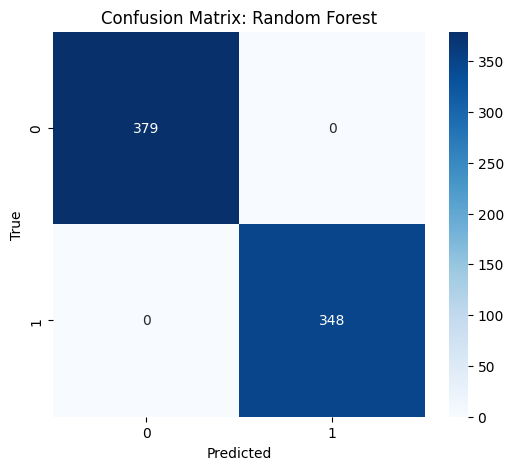

Model: Gradient Boosting
Accuracy: 0.89
Precision: 0.90
Recall: 0.89
F1 Score: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       379
           1       0.85      0.94      0.89       348

    accuracy                           0.89       727
   macro avg       0.89      0.89      0.89       727
weighted avg       0.90      0.89      0.89       727



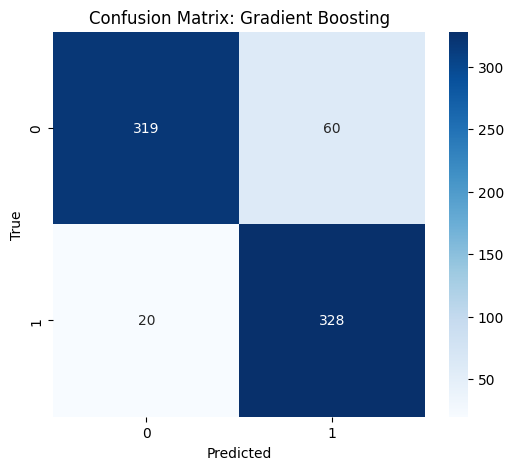

Model: K-Nearest Neighbors
Accuracy: 0.88
Precision: 0.90
Recall: 0.88
F1 Score: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       379
           1       0.83      0.96      0.89       348

    accuracy                           0.88       727
   macro avg       0.89      0.89      0.88       727
weighted avg       0.90      0.88      0.88       727



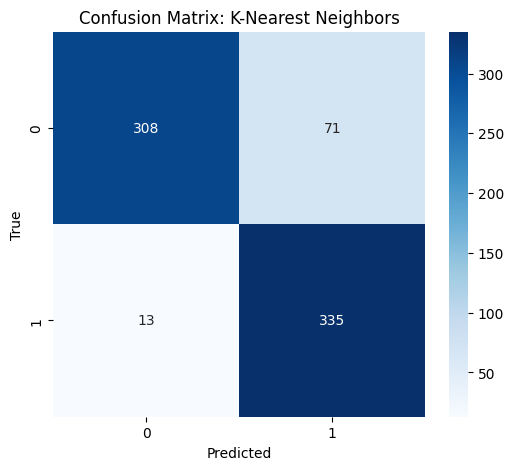

Model: Support Vector Machine
Accuracy: 0.85
Precision: 0.85
Recall: 0.85
F1 Score: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.84       379
           1       0.80      0.91      0.85       348

    accuracy                           0.85       727
   macro avg       0.85      0.85      0.85       727
weighted avg       0.85      0.85      0.85       727



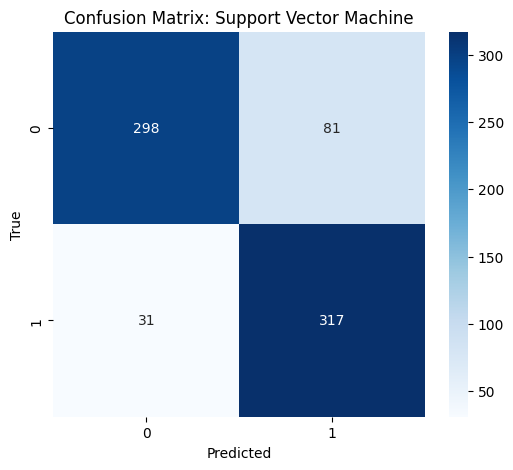

In [28]:
# Initialize models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier

# Initialize Standard
scaler2 = StandardScaler()

# Apply Standard
X_train_scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)


# Dictionary to store results
results2 = {}

# List of models to evaluate
models2 = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(probability=True)
}

# Train and evaluate each model
for name2, model2 in models2.items():
    # Train the model
    model2.fit(X_train_scaled2, y_train2)
    # Make predictions
    y_pred2 = model2.predict(X_test_scaled2)
    # Collect metrics
    accuracy2 = accuracy_score(y_test2, y_pred2)
    precision2 = precision_score(y_test2, y_pred2, average='weighted')
    recall2 = recall_score(y_test2, y_pred2, average='weighted')
    f12 = f1_score(y_test2, y_pred2, average='weighted')
    report2 = classification_report(y_test2, y_pred2)
    cm2 = confusion_matrix(y_test2, y_pred2)
    
    # Save results
    results2[name2] = {
        "Accuracy": accuracy2,
        "Precision": precision2,
        "Recall": recall2,
        "F1 Score": f12,
        "Classification Report": report2,
        "Confusion Matrix": cm2
    }

# Function to plot confusion matrices
def plot_confusion_matrix(cm2, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Display results and plot confusion matrices
for name2, result2 in results2.items():
    print(f"Model: {name2}")
    print(f"Accuracy: {result2['Accuracy']:.2f}")
    print(f"Precision: {result2['Precision']:.2f}")
    print(f"Recall: {result2['Recall']:.2f}")
    print(f"F1 Score: {result2['F1 Score']:.2f}")
    print("Classification Report:")
    print(result2["Classification Report"])
    plot_confusion_matrix(result2["Confusion Matrix"], f"Confusion Matrix: {name2}")

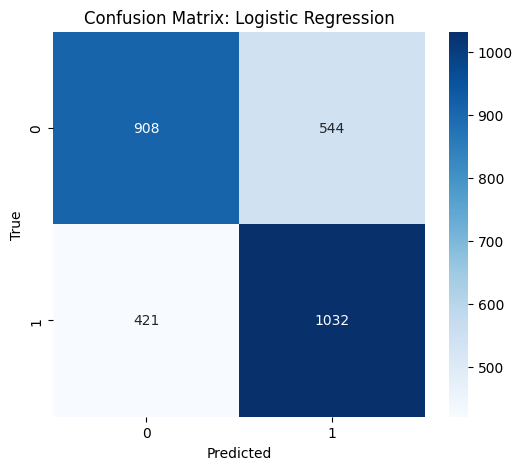

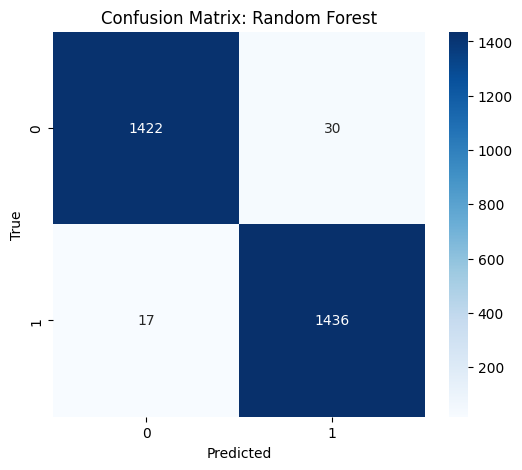

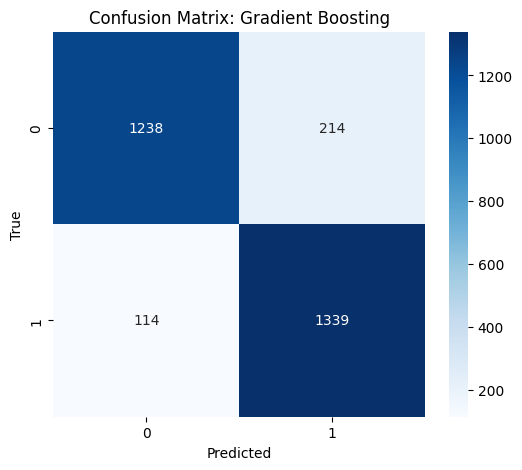

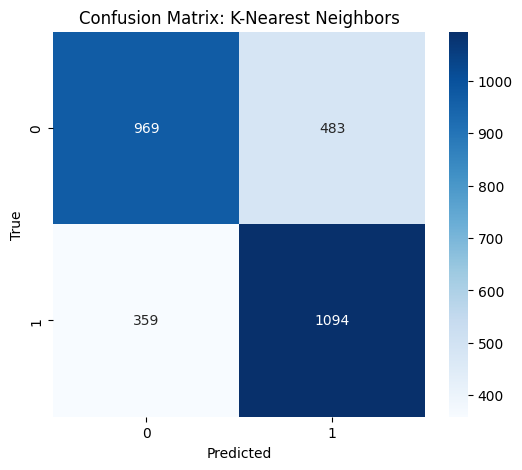

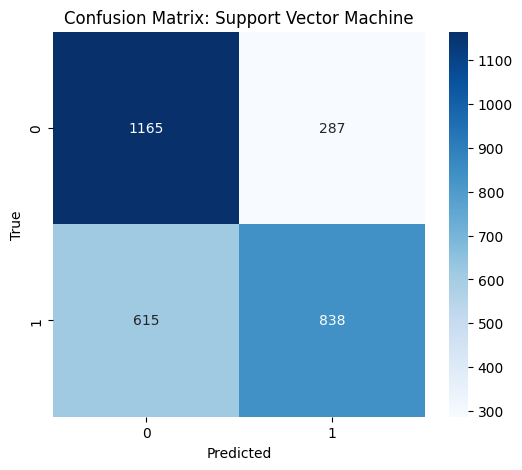

Model: Logistic Regression
Accuracy: 0.67
Precision: 0.67
Recall: 0.67
F1 Score: 0.67
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      1452
           1       0.65      0.71      0.68      1453

    accuracy                           0.67      2905
   macro avg       0.67      0.67      0.67      2905
weighted avg       0.67      0.67      0.67      2905


--------------------------------------------------

Model: Random Forest
Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1452
           1       0.98      0.99      0.98      1453

    accuracy                           0.98      2905
   macro avg       0.98      0.98      0.98      2905
weighted avg       0.98      0.98      0.98      2905


--------------------------------------------------

Model: Gradient Boosting
Acc

In [29]:
from sklearn.model_selection import cross_val_predict, cross_val_score

# Dictionary to store results
results = {}

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Evaluate each model with cross-validation
for name, model in models.items():
    # Perform cross-validation predictions
    y_pred = cross_val_predict(model, X_train, y_train, cv=5)
    # Collect metrics
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='weighted')
    recall = recall_score(y_train, y_pred, average='weighted')
    f1 = f1_score(y_train, y_pred, average='weighted')
    cm = confusion_matrix(y_train, y_pred)
    report = classification_report(y_train, y_pred)
    
    # Save results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Classification Report": report,
        "Confusion Matrix": cm
    }

    # Plot confusion matrix
    plot_confusion_matrix(cm, f"Confusion Matrix: {name}")

# Display metrics
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"F1 Score: {result['F1 Score']:.2f}")
    print("Classification Report:")
    print(result["Classification Report"])
    print("\n" + "-"*50 + "\n")


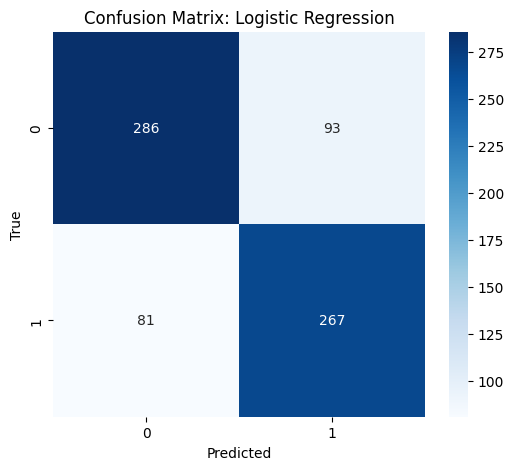

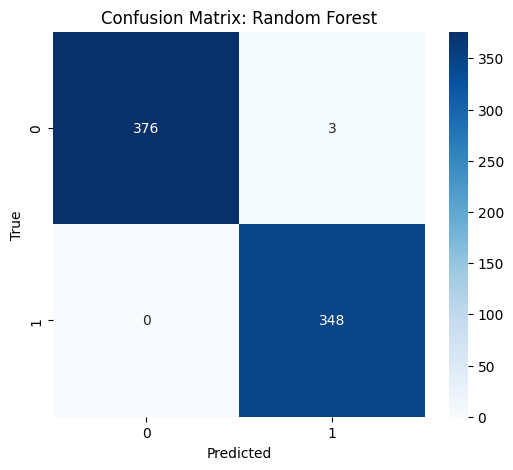

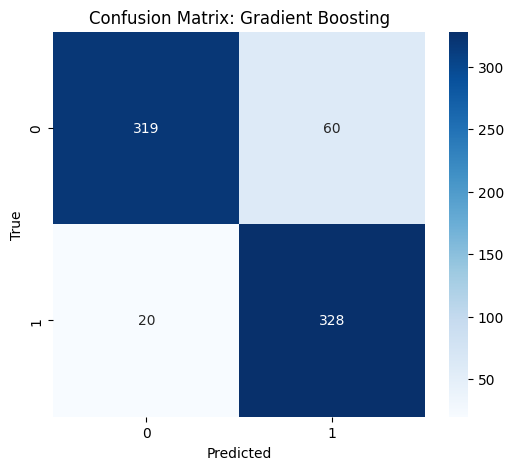

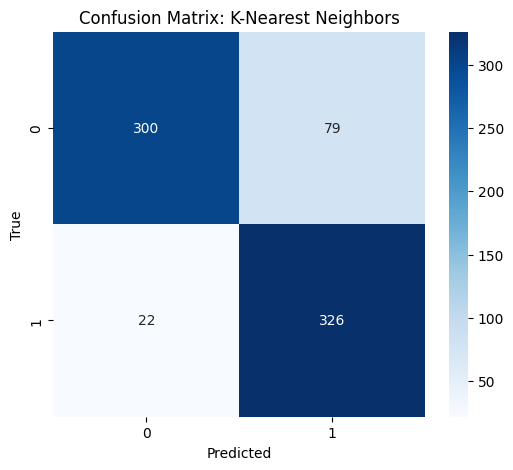

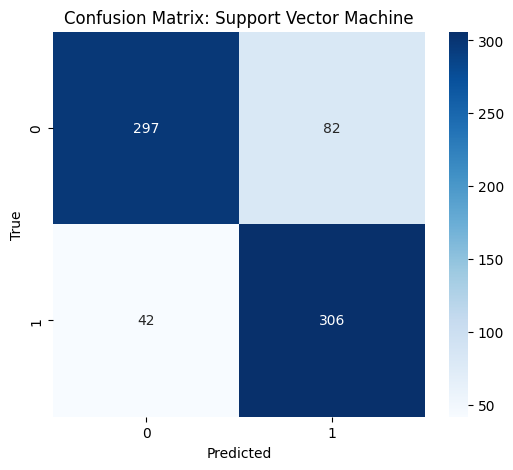

Model: Logistic Regression
Accuracy: 0.76
Precision: 0.76
Recall: 0.76
F1 Score: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77       379
           1       0.74      0.77      0.75       348

    accuracy                           0.76       727
   macro avg       0.76      0.76      0.76       727
weighted avg       0.76      0.76      0.76       727


--------------------------------------------------

Model: Random Forest
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       379
           1       0.99      1.00      1.00       348

    accuracy                           1.00       727
   macro avg       1.00      1.00      1.00       727
weighted avg       1.00      1.00      1.00       727


--------------------------------------------------

Model: Gradient Boosting
Acc

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Train and evaluate each model with scaled data
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    # Collect metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Save results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Classification Report": report,
        "Confusion Matrix": cm
    }

    # Plot confusion matrix
    plot_confusion_matrix(cm, f"Confusion Matrix: {name}")

# Display metrics
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"F1 Score: {result['F1 Score']:.2f}")
    print("Classification Report:")
    print(result["Classification Report"])
    print("\n" + "-"*50 + "\n")


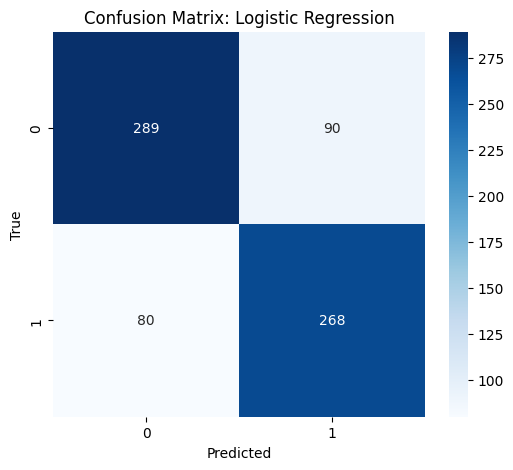

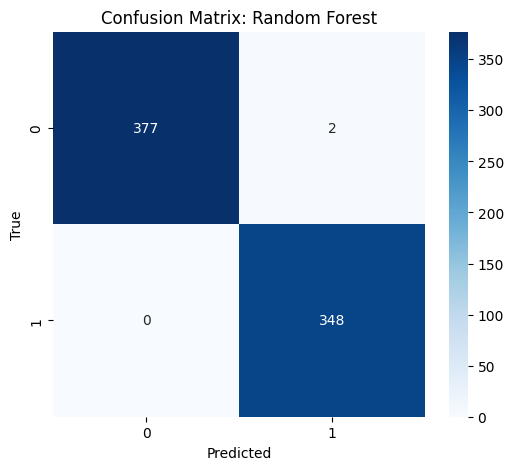

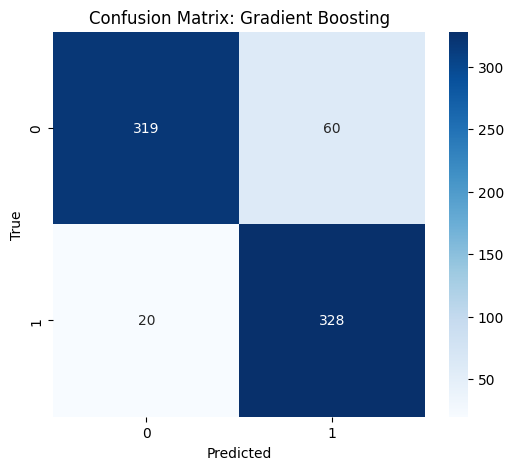

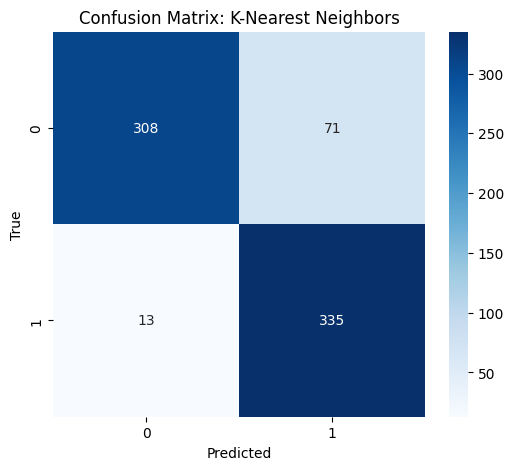

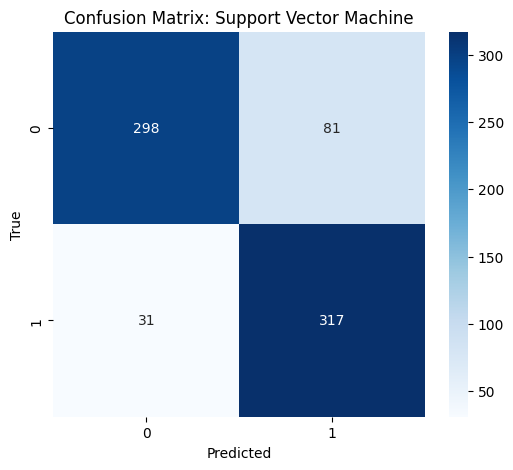

Model: Logistic Regression
Accuracy: 0.77
Precision: 0.77
Recall: 0.77
F1 Score: 0.77
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       379
           1       0.75      0.77      0.76       348

    accuracy                           0.77       727
   macro avg       0.77      0.77      0.77       727
weighted avg       0.77      0.77      0.77       727


--------------------------------------------------

Model: Random Forest
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       379
           1       0.99      1.00      1.00       348

    accuracy                           1.00       727
   macro avg       1.00      1.00      1.00       727
weighted avg       1.00      1.00      1.00       727


--------------------------------------------------

Model: Gradient Boosting
Acc

In [31]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = StandardScaler()

# Apply Standard Scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store results
results = {}

# Train and evaluate each model with scaled data
for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    # Collect metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Save results
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Classification Report": report,
        "Confusion Matrix": cm
    }

    # Plot confusion matrix
    plot_confusion_matrix(cm, f"Confusion Matrix: {name}")

# Display metrics
for name, result in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {result['Accuracy']:.2f}")
    print(f"Precision: {result['Precision']:.2f}")
    print(f"Recall: {result['Recall']:.2f}")
    print(f"F1 Score: {result['F1 Score']:.2f}")
    print("Classification Report:")
    print(result["Classification Report"])
    print("\n" + "-"*50 + "\n")
